### 患者ごとのヒストグラムを確認。
また、ヒストグラム均一化をしてどうなるかも確認する  

アイデア:時相間のKLダイバージェンスを確認し、それによってどれくらいHIST EQを掛けるか、考える。

In [140]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
import SimpleITK as sitk
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
pd.set_option('display.max_columns', 100)
plt.rcParams["font.size"] = 14
plt.rcParams["font.weight"] = 800


In [4]:
cid_path=Path('/home/kakeya/Desktop/higuchi/data/00146')
ccrcc_path=cid_path/'CCRCC.nii.gz'
kidney_path=cid_path/'kidney.nii.gz'
se2_path=cid_path/'SE2.nii.gz'
se3_path=cid_path/'SE3.nii.gz'

In [147]:
def _read_niigz(path:Path)->np.array:
    if os.path.isfile(path):
        data = sitk.ReadImage(str(path))
        return sitk.GetArrayFromImage(data)
    else:
        print(f'Not Found {path}')
        return np.zeros((10,10,10))


In [5]:

se3=_read_niigz(se3_path)
se2=_read_niigz(se2_path)
kidney=_read_niigz(kidney_path)
ccrcc=_read_niigz(ccrcc_path)

se2 = np.clip(se2, -768, 768)
se3 = np.clip(se3, -768, 768)

In [158]:
candidate_list=[   '001','002','003','004','005','006','007','008','009','010',
   '011','012','013','014','015','017','018','019','021',
   '022','023','024','025','026','028','029','030','031','032',
   '033','034','035','036','037','038','039','040','041','044',
   '045','046','047','051','053','055','057','058','060','061',
   '062','063','064','065','066','067','068','069','071','072',
   '073','074','076','077','078','079','082','083','086','088',
   '090','093','094','095','096','097','098','101','102','103',
   '104','105','107','109','112','113','115','117','118','119',
   '121','122','123','124','125','126','127','130','134','135',
   '136','138','140','142','145','146','147','149','150','151',
   '152','154','157','159'
]



### 患者ごと、時相ごとのヒストグラムを確認する
下記コードは画像保存も行う

In [159]:
for cid in candidate_list:
    print(cid,end='|')
    cid_path=Path(f'/home/kakeya/Desktop/higuchi/data/00{cid}')
    ccrcc_path=cid_path/'CCRCC.nii.gz'
    
    kidney_path=cid_path/'kidney.nii.gz'
    se2_path=cid_path/'SE2.nii.gz'
    se3_path=cid_path/'SE3.nii.gz'

    se3=_read_niigz(se3_path)
    se2=_read_niigz(se2_path)
    kidney=_read_niigz(kidney_path)
    ccrcc=_read_niigz(ccrcc_path)
    se2 = np.clip(se2, -750,750)
    se3 = np.clip(se3, -750, 750)
    fig=plt.figure(figsize=(12,8))
    ax1=fig.add_subplot(321)
    ax2=fig.add_subplot(322)
    ax3=fig.add_subplot(323)
    ax4=fig.add_subplot(324)
    ax5=fig.add_subplot(325)
    ax6=fig.add_subplot(326)
    
    axs=[ax1,ax2,ax3,ax4]
    titles=['SE2_kid','SE3_kid','SE2_ccrcc','SE3_ccrcc']
    plt.rcParams["font.size"] = 14
    plt.rcParams["font.weight"] = 800
    
    se2_kid=se2[kidney>0] if kidney.sum()!=0 else kidney.flatten()
    se3_kid=se3[kidney>0] if kidney.sum()!=0 else kidney.flatten()
    se2_ccrcc=se2[ccrcc>0] if ccrcc.sum()!=0 else ccrcc.flatten()
    se3_ccrcc=se3[ccrcc>0] if ccrcc.sum()!=0 else ccrcc.flatten()
    
    
    ax1.hist(se2_kid, bins='auto')
    ax2.hist(se3_kid, bins='auto')
    ax3.hist(se2_ccrcc, bins='auto')
    ax4.hist(se3_ccrcc, bins='auto')
    
    for ax,title in zip(axs,titles):
        ax.set_xlim(-350,350)
        ax.set_xlabel("CT")
        ax.set_ylabel("count")
        ax.set_title(title)

    ax5.set_xlim(-750,750)
    ax5.set_ylim(0,600000)

    ax5.hist(se2.flatten(), bins='auto')
    ax5.set_title('whole_SE2')

    ax6.set_xlim(-750,750)
    ax6.hist(se3.flatten(), bins='auto')
    ax6.set_title('whole_SE3')
    ax6.set_ylim(0,600000)



    fig.suptitle(f'cid:00{cid}', fontsize=20)
    plt.tight_layout()
    plt.savefig(f'../output/CT_histgram/00{cid}.png')
    plt.clf()
    plt.close()



034|035|Not Found /home/kakeya/Desktop/higuchi/data/00035/CCRCC.nii.gz
036|Not Found /home/kakeya/Desktop/higuchi/data/00036/CCRCC.nii.gz
037|038|039|040|041|044|045|046|047|051|053|055|057|058|060|061|062|063|064|065|066|067|068|069|071|072|073|074|076|077|078|079|082|083|086|088|090|093|094|095|096|097|098|101|102|103|104|105|107|109|112|113|115|117|118|119|121|122|123|124|125|126|127|130|134|135|136|138|140|142|145|146|147|149|150|151|152|154|157|159|Not Found /home/kakeya/Desktop/higuchi/data/00159/CCRCC.nii.gz


In [216]:
cid_path=Path('/home/kakeya/Desktop/higuchi/data/00146')

se3_path=cid_path/'SE3.nii.gz'

#-750~750から、0~1500に変換する
se3=_read_niigz(se3_path)
# se3 = np.clip(se3, -750, 750)
# # se3=se3[ccrcc>0]
# se3=se3+750

In [202]:
kidney_path=cid_path/'kidney.nii.gz'

kidney=_read_niigz(kidney_path)


In [236]:
ccrcc_path=cid_path/'CCRCC.nii.gz'
ccrcc=_read_niigz(ccrcc_path)

In [64]:
ctRange=1500
#各輝度値の度数を返す
hist, _  = np.histogram(se3.flatten(), ctRange, [0, ctRange])


In [127]:
import numpy.ma as ma
### 腎臓があるとこだけを指標にhist equalをかける
mask_se3=ma.masked_where(kidney==0, se3)

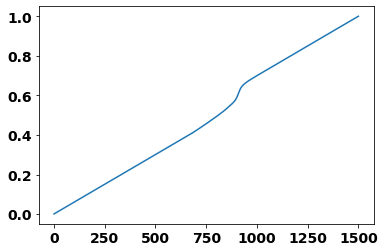

In [249]:
new_se3=histgram_equalization(se3,kidney,vmin=-750,vmax=750,alpha=0.1)

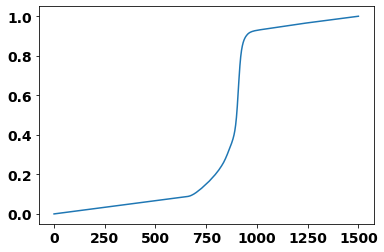

In [252]:
new_se3=histgram_equalization(se3,kidney,vmin=-750,vmax=750,alpha=0.8)

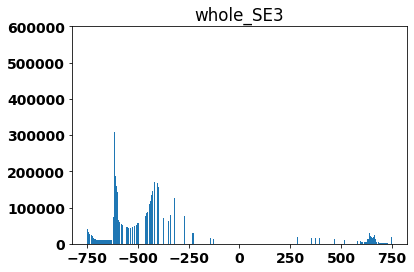

In [253]:
plt.hist(new_se3.flatten(), bins='auto')
plt.title('whole_SE3')
plt.ylim(0,600000)
plt.show()

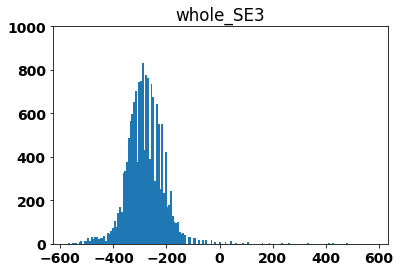

In [254]:
plt.hist(new_se3[ccrcc>0], bins='auto')
plt.title('whole_SE3')
plt.ylim(0,1000)
plt.show()

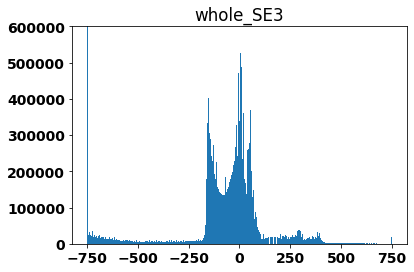

In [250]:
plt.hist(new_se3.flatten(), bins='auto')
plt.title('whole_SE3')
plt.ylim(0,600000)
plt.show()

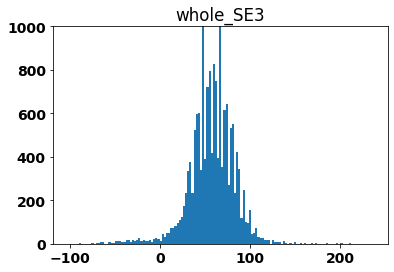

In [251]:
plt.hist(new_se3[ccrcc>0], bins='auto')
plt.title('whole_SE3')
plt.ylim(0,1000)
plt.show()

In [229]:
cid_path=Path('/home/kakeya/Desktop/higuchi/data/00146')
se3_path=cid_path/'SE3.nii.gz'
kidney_path=cid_path/'kidney.nii.gz'
kidney=_read_niigz(kidney_path)
#-750~750から、0~1500に変換する
se3=_read_niigz(se3_path)

def histgram_equalization(whole_array,ROI_array,vmin=-750,vmax=750,alpha=0.5):
    whole_array = np.clip(whole_array, vmin, vmax)
    whole_array+=vmax
    mask_whole_array=ma.masked_where(ROI_array==0, whole_array)
    
    ctRange = vmax-vmin +1
    HIST = np.array([0.0]*ctRange)
    roi_hist, _  = np.histogram(mask_whole_array[~mask_whole_array.mask], ctRange, [0, ctRange])
    
    #1に正規化する
    HIST = roi_hist/roi_hist.sum()
    #一様分布を混ぜる
    HIST = HIST *  alpha+(1 - alpha) / 1500
    #累積和を求める
    cdf = HIST.cumsum()
    plt.plot(cdf)
    #度数が0のところは処理しないというマスクを作成する
    mask_cdf = np.ma.masked_equal(cdf,0)
    standered_mask_cdf = (mask_cdf - mask_cdf.min())/(mask_cdf.max()-mask_cdf.min())
    standered_mask_cdf = 1500*standered_mask_cdf
    standered_mask_cdf = np.ma.filled(standered_mask_cdf,0).astype('int64')

    whole_array=whole_array.astype(int)
    new_whole_array=standered_mask_cdf[whole_array] - 750
    return new_whole_array

[0.00033333 0.00033333 0.00033333 ... 0.00033333 0.00033333 0.00033333]


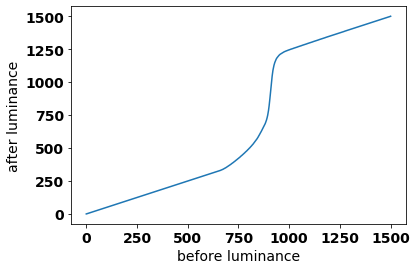

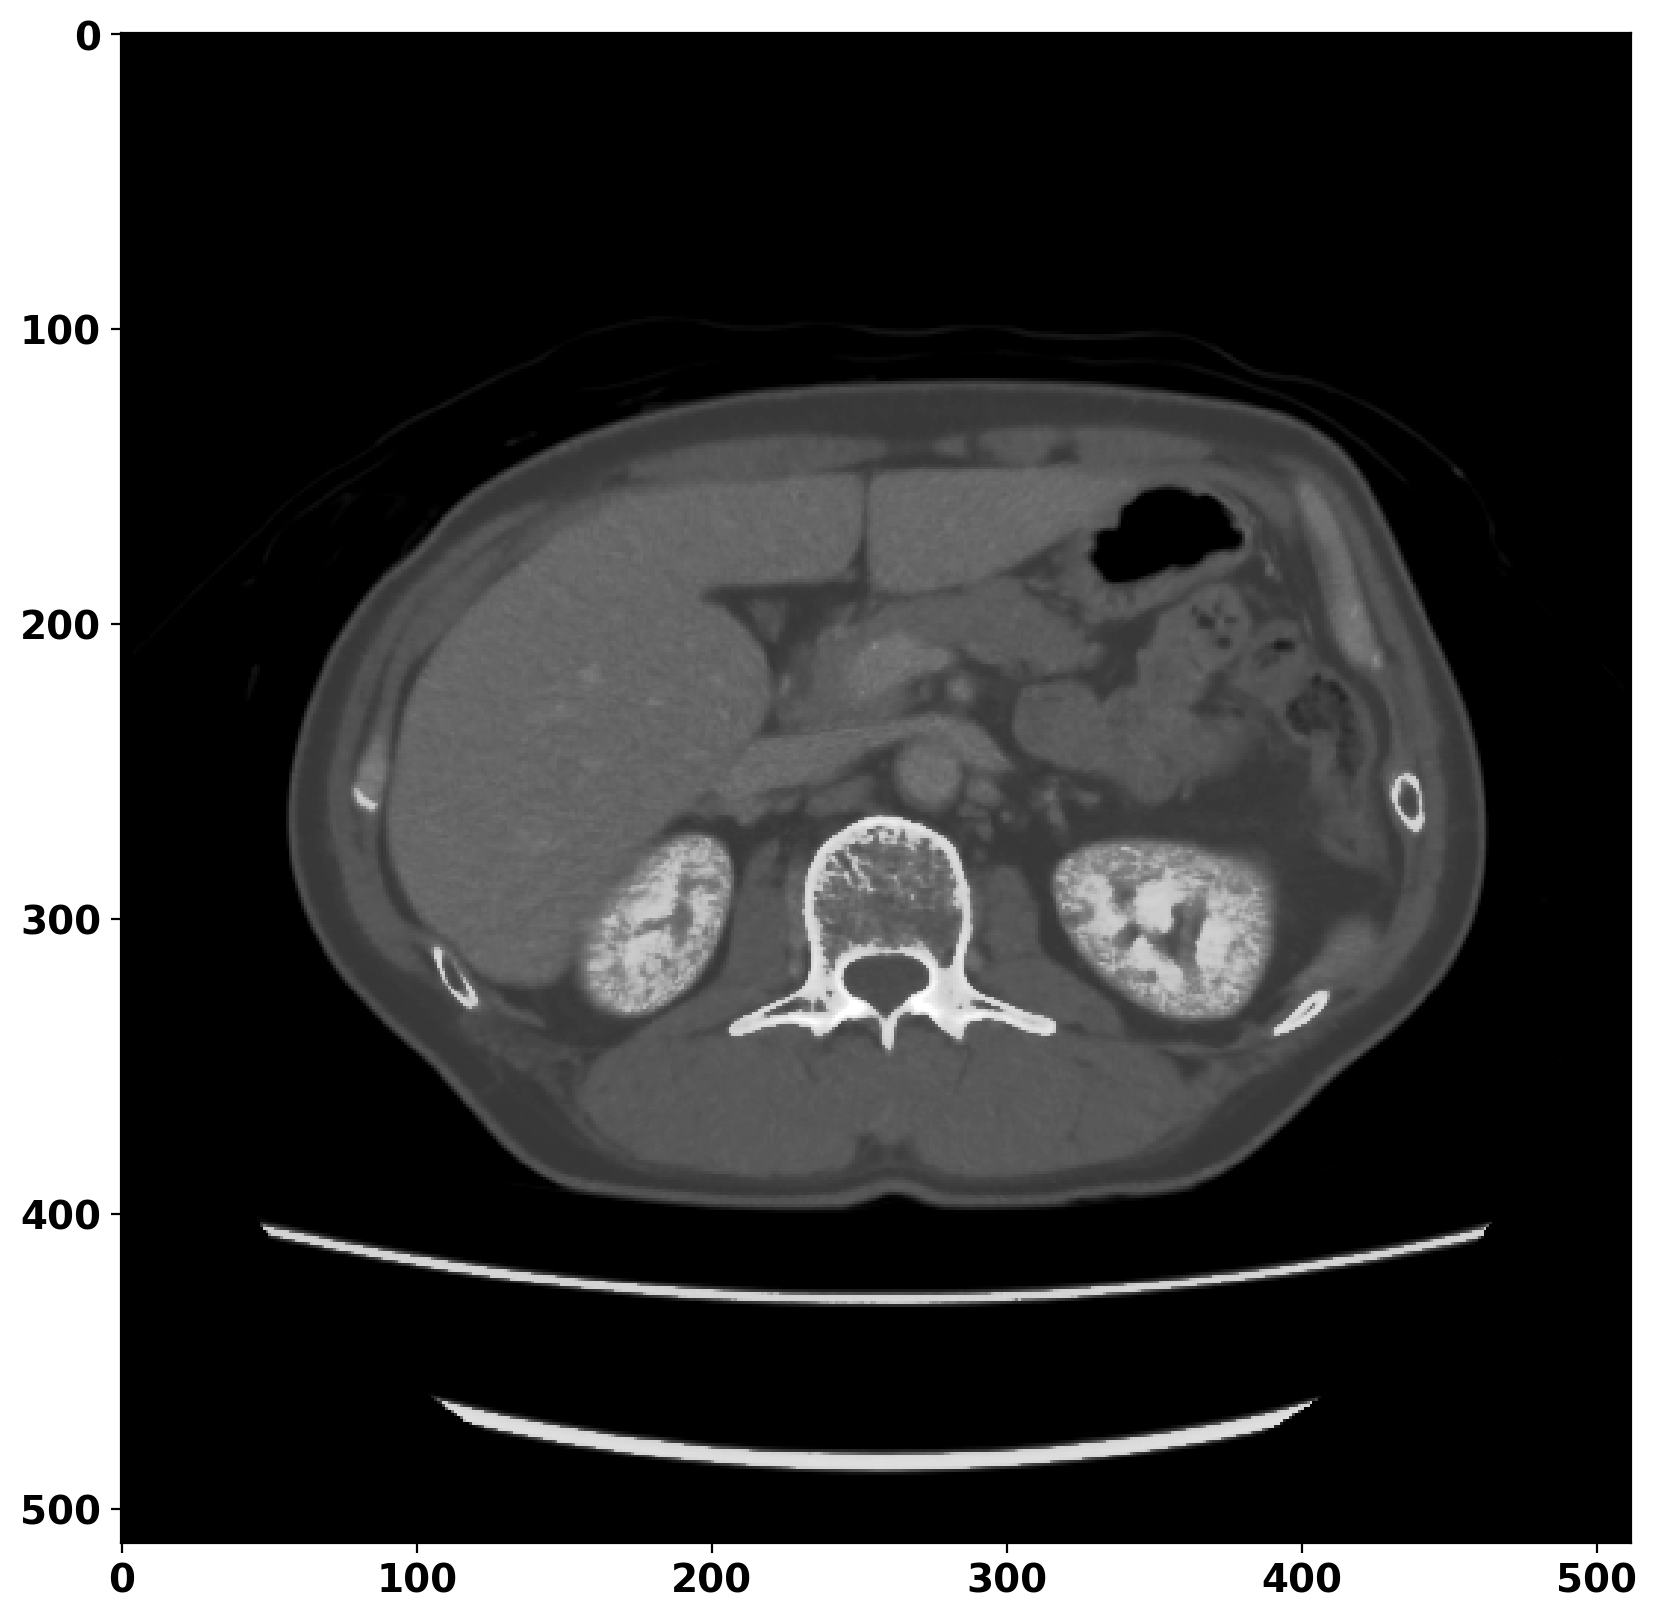

In [203]:
alpha=0.6
ctRange = 1500 + 1
#uniformDistribution = np.array([ctRange]*ctRange)

HIST = np.array([0.0]*ctRange)
#mask_se3[~mask_se3.mask]でマスクされてないところだけが取り出される
hist, _  = np.histogram(mask_se3[~mask_se3.mask], ctRange, [0, ctRange])

#1に正規化する
HIST = hist/hist.sum()
#一様分布を混ぜる
HIST = HIST *  alpha+(1 - alpha) / 1500
print(HIST)
#累積和を求める
cdf = HIST.cumsum()


#度数が0のところは処理しないというマスクを作成する
cdf_m = np.ma.masked_equal(cdf,0)
temp = (cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())
cdf_m = 1500*temp
cdf = np.ma.filled(cdf_m,0).astype('int64')
plt.plot(cdf)
plt.xlabel('before luminance')
plt.ylabel('after luminance')

plt.show()
se3=se3.astype(int)
#元画像の値をindexとしてcdfを参照し、値を返している。
se3_hist=cdf[se3] - 750

plt.figure(figsize=(10,10),dpi=200)
plt.gray()
plt.imshow(se3_hist[110,:,:],vmin=-750,vmax=750)

In [ ]:
def makeCDF(imgArrayList, alpha = 0):#imgArrayList:int64
    imgArrayList = [ x + 1024 for x in imgArrayList ]
    
    imgArrayList = [np.where(x<0, 0, x) for x in imgArrayList]
    imgArrayList = [np.where(x>2048, 2048,x) for x in imgArrayList]
    
    ctRange = 1500 + 1
    #uniformDistribution = np.array([ctRange]*ctRange)
    
    HIST = np.array([0.0]*ctRange)
    hist, _  = np.histogram(x.flatten(), ctRange, [0, ctRange+1])
    
    
    print(HIST)
    
    cdf_m = 2048*temp
    cdf = np.ma.filled(cdf_m,0).astype('int64')
    
    return cdf,imgArrayList

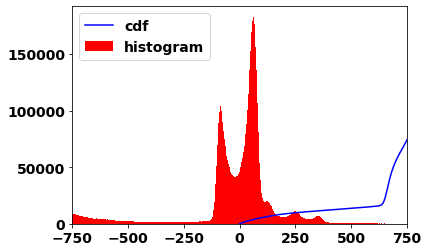

In [84]:
hist,bins = np.histogram(se2.flatten(),1500,[-750,750])

cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.plot(cdf_normalized, color = 'b')
plt.hist(se2.flatten(),1500,[-750,750], color = 'r')
plt.xlim([-750,750])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

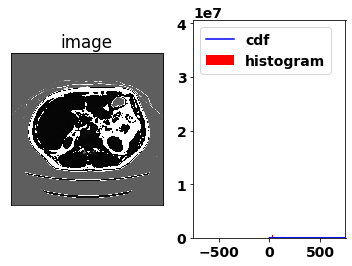

In [85]:
cdf_m = np.ma.masked_equal(cdf,-750)
cdf_m = (cdf_m - cdf_m.min())*1500/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,-750).astype('int')

img2 = cdf[se2]

hist,bins = np.histogram(img2.flatten(),1500,[-750,750])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

plt.subplot(1,2,1),plt.imshow(img2[100,:,:],cmap='gray')
plt.xticks([]),plt.yticks([]),plt.title('image')
plt.subplot(1,2,2),plt.plot(cdf_normalized, color = 'b')
plt.hist(img2.flatten(),1500,[-750,750], color = 'r')
plt.xlim([-750,750])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

In [73]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*1500/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('int')

In [ ]:

candidate='146'

image_list=['SE2','SE3']
label_list=['kidney','CCRCC','cyst']
ROOT_DIR='/home/kakeya/Desktop/higuchi/data'

def _read_niigz(path:Path)->np.array:
    if os.path.isfile(path):
        data = sitk.ReadImage(str(path))
        return sitk.GetArrayFromImage(data)
    else:
        print(f'Not Found {path}')
        return np.zeros((10,10,10))

def extract_ROI(voxel_label: np.array, voxel_image=None, threshold=0):
    '''voxelデータの関心領域以外を除去する
        indexと切り取ったvoxelを返す    
    '''
    sliceIndex = []
    # 高さ方向の腎臓、腎臓がんの範囲特定
    for z in range(len(voxel_label[:,0, 0])):
        if np.where(voxel_label[z, :, :] != threshold, True, False).any():
            sliceIndex.append(z)
    return voxel_label[sliceIndex, :, :], voxel_image[sliceIndex, :, :], sliceIndex


all_df=pd.DataFrame(columns=['index'])
all_df['index']=[int(cid) for cid in candidate_list]
all_df=all_df.set_index('index')

st_df=pd.DataFrame(columns=['shape','count','lumi_mean','lumi_std','lumi_max','lumi_min'])

image_list=['SE2','SE3']
label_list=['kidney','CCRCC','cy_read_niigzst']
for image in image_list:
    for label in label_list:
        for cid in tqdm(candidate_list):
            cid_path=Path(ROOT_DIR)/f'00{cid.zfill(3)}'

            path = cid_path/f'{image}.nii.gz'
            im_arr=_read_niigz(path)

            path = cid_path/f'{label}.nii.gz'
            if os.path.isfile(path):
                label_arr=_read_niigz(path)
                label_arr,im_arr,sid = extract_ROI(label_arr,im_arr,threshold=0)
                slice_shape=label_arr.shape

                im_arr = np.where(label_arr == 1, im_arr, -1300)

                flat_im = im_arr.reshape(-1)
                flat_im = flat_im[flat_im > -1000]
                st_df.at[int(cid), 'shape'] = slice_shape
                st_df.at[int(cid), 'count'] = flat_im.shape[0]
                st_df.at[int(cid), 'lumi_mean'] = flat_im.mean()
                st_df.at[int(cid), 'lumi_std'] = flat_im.std()
                st_df.at[int(cid), 'lumi_max'] = flat_im.max()
                st_df.at[int(cid), 'lumi_min'] = flat_im.min()
            else:
                st_df.at[int(cid), 'shape'] = np.nan
                st_df.at[int(cid), 'count'] = np.nan
                st_df.at[int(cid), 'lumi_mean'] = np.nan
                st_df.at[int(cid), 'lumi_std'] = np.nan
                st_df.at[int(cid), 'lumi_max'] = np.nan
                st_df.at[int(cid), 'lumi_min'] = np.nan
        all_df=all_df.merge(st_df,how='left',suffixes=('',f'_{image}_{label[:3]}'),right_index=True ,left_index=True)
        
